# Analysis

Observation 1 - I ran this analysis late Monday night and again on Tuesday.  All five news organizations had negative results for their aggregate figures in the bar chart.  I would like to run the analysis a couple more days, but my initial results suggest that new organizations Tweet more negative comments than positive.
Observation 2 - I believe that the aggregate amounts in the bar chart match up with what I can see in the scatter plot.  One additional observation I had of the scatter plot is that the negative aggregate amounts are more likely due to a higher number of negative tweets than positive tweets, rather than tweets that are very negative. 
Observation 3 - At the same time, the aggregate sentiment analysis on tweets by CBS are less negative than any other news outlet.  This may be because their orange plots show up as some of the most positive tweets on my scatter plot.

# News Mood

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pprint
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User Accounts
bbc_user = "@BBCNews"
cbs_user = "@CBSNews"
cnn_user = "@CNN"
fox_user = "@FoxNews"
nyt_user = "@nytimes"

news = [bbc_user, cbs_user, cnn_user, fox_user, nyt_user]

# Variables for holding sentiments
bbc_sentiments = []
cbs_sentiments = []
cnn_sentiments = []
fox_sentiments = []
nyt_sentiments = []
#positive_list = []
#negative_list = []
#neutral_list = []

for station in news:
    counter = 1
    # Loop through 5 pages of tweets (total 100 tweets per user account)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(station,page=x+1)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            content = tweet["text"]
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            if station == bbc_user:
                bbc_sentiments.append({"Date": tweet["created_at"],
                            "Source":station,
                           "Tweet": content,          
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
                counter = counter + 1
                
            if station == cbs_user:
                cbs_sentiments.append({"Date": tweet["created_at"],
                            "Source":station,
                           "Tweet": content,          
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
                counter = counter + 1
                
            if station == cnn_user:
                cnn_sentiments.append({"Date": tweet["created_at"],
                            "Source":station,
                           "Tweet": content,          
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
                counter = counter + 1
                
            if station == fox_user:
                fox_sentiments.append({"Date": tweet["created_at"],
                            "Source":station,
                           "Tweet": content,          
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
                counter = counter + 1
                
            if station == nyt_user:
                nyt_sentiments.append({"Date": tweet["created_at"],
                            "Source":station,
                           "Tweet": content,          
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
                counter = counter + 1

In [30]:
bbc_sentiments_pd = pd.DataFrame.from_dict(bbc_sentiments)
cbs_sentiments_pd = pd.DataFrame.from_dict(cbs_sentiments)
cnn_sentiments_pd = pd.DataFrame.from_dict(cnn_sentiments)
fox_sentiments_pd = pd.DataFrame.from_dict(fox_sentiments)
nyt_sentiments_pd = pd.DataFrame.from_dict(nyt_sentiments)
combined_sentiments_pd = bbc_sentiments_pd
combined_sentiments_pd = combined_sentiments_pd.append(cbs_sentiments_pd, ignore_index=True)
combined_sentiments_pd = combined_sentiments_pd.append(cnn_sentiments_pd, ignore_index=True)
combined_sentiments_pd = combined_sentiments_pd.append(fox_sentiments_pd, ignore_index=True)
combined_sentiments_pd = combined_sentiments_pd.append(nyt_sentiments_pd, ignore_index=True)

In [33]:
#save data frame and print preview
combined_sentiments_pd.to_csv("twitterData.csv", index=False, header=True)
combined_sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Source,Tweet,Tweets Ago
0,-0.8750,Tue Mar 20 18:46:10 +0000 2018,0.444,0.556,0.000,@BBCNews,Man guilty of hate crime for filming pug's 'Na...,1
1,-0.5574,Tue Mar 20 18:40:36 +0000 2018,0.847,0.153,0.000,@BBCNews,RAF spokesman confirms an engineer from the Re...,2
2,-0.2144,Tue Mar 20 18:27:04 +0000 2018,0.598,0.236,0.166,@BBCNews,RT @BBCBreaking: Engineer killed but pilot sur...,3
3,0.0000,Tue Mar 20 18:07:01 +0000 2018,1.000,0.000,0.000,@BBCNews,Jennie Formby named as Labour's new general se...,4
4,-0.1893,Tue Mar 20 17:53:09 +0000 2018,0.932,0.068,0.000,@BBCNews,RT @bbcweather: Cold snap or snow at Easter? T...,5
5,0.0000,Tue Mar 20 17:46:03 +0000 2018,1.000,0.000,0.000,@BBCNews,Katie Boyle: Former TV host dies aged 91 https...,6
6,-0.3818,Tue Mar 20 17:46:03 +0000 2018,0.809,0.191,0.000,@BBCNews,Stephen Hawking's ashes to be interred near Si...,7
7,-0.2960,Tue Mar 20 16:44:54 +0000 2018,0.909,0.091,0.000,@BBCNews,RT @BBCBreaking: Ashes of Professor Stephen Ha...,8
8,-0.4019,Tue Mar 20 16:42:55 +0000 2018,0.870,0.130,0.000,@BBCNews,RT @BBCWalesNews: Red Arrows crash eyewitness ...,9
9,-0.5994,Tue Mar 20 15:07:58 +0000 2018,0.698,0.302,0.000,@BBCNews,Sophie Lionnet death: Nanny 'pushed to confirm...,10


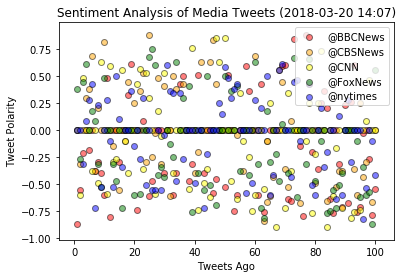

In [9]:
bbc_x = bbc_sentiments_pd["Tweets Ago"]
bbc_y = bbc_sentiments_pd["Compound"]
cbs_x = cbs_sentiments_pd["Tweets Ago"]
cbs_y = cbs_sentiments_pd["Compound"]
cnn_x = cnn_sentiments_pd["Tweets Ago"]
cnn_y = cnn_sentiments_pd["Compound"]
fox_x = fox_sentiments_pd["Tweets Ago"]
fox_y = fox_sentiments_pd["Compound"]
nyt_x = nyt_sentiments_pd["Tweets Ago"]
nyt_y = nyt_sentiments_pd["Compound"]

bbc_handle = plt.scatter(bbc_x, bbc_y, marker ='o', color='red', edgecolors="black", label=bbc_user, alpha=.5)
cbs_handle = plt.scatter(cbs_x, cbs_y, marker ='o', color='orange', edgecolors="black", label=cbs_user, alpha=.5)
cnn_handle = plt.scatter(cnn_x, cnn_y, marker ='o', color='yellow', edgecolors="black", label=cnn_user, alpha=.5)
fox_handle = plt.scatter(fox_x, fox_y, marker ='o', color='green', edgecolors="black", label=fox_user, alpha=.5)
nyt_handle = plt.scatter(nyt_x, nyt_y, marker ='o', color='blue', edgecolors="black", label=nyt_user, alpha=.5)

plt.legend(handles=[bbc_handle, cbs_handle, cnn_handle, fox_handle, nyt_handle], loc="best")

#plt.scatter(np.arange(len(nyt_compound_list)),
#         nyt_compound_list, marker="o", alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Media Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Twitter_News_Sentiment_Scatter_Plot.png")
plt.show()

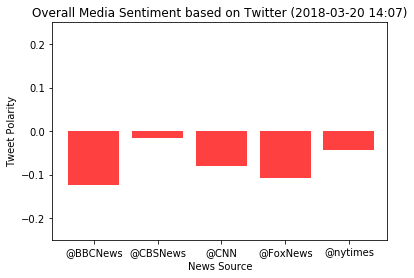

In [10]:
sentiment = [bbc_sentiments_pd["Compound"].mean(),cbs_sentiments_pd["Compound"].mean(),cnn_sentiments_pd["Compound"].mean(),fox_sentiments_pd["Compound"].mean(),nyt_sentiments_pd["Compound"].mean()]
x_axis = np.arange(0, len(news))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Overall Media Sentiment based on Twitter ({})".format(now))
plt.xlabel("News Source")
plt.ylabel("Tweet Polarity")

plt.xlim(-0.25, len(news))
plt.ylim(-.25, .25)

plt.bar(x_axis, sentiment, facecolor="red", alpha=0.75, align="edge")
plt.xticks(tick_locations, news)
plt.savefig("Twitter_News_Overall_Sentiment_Bar_Chart.png")
plt.show()